In [1]:
import sys
import os
from dotenv import load_dotenv
import psycopg2
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
load_dotenv()
user = os.environ['DB_USER']
password = os.environ['DB_PASS']
host = os.environ['DB_HOST']
port = os.environ['DB_PORT']
database = os.environ['DB_NAME']

In [3]:
def connect():
    conn = None
    try:
        print('Connecting..')
        conn = psycopg2.connect(
              host=host,
              database=database,
              user=user,
              password=password
        )
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        sys.exit(1)   
        
    print("All good, Connection successful!")
    return conn

def sql_to_dataframe(conn, query):
    """Import data from a PostgreSQL database using a SELECT query"""
    cursor = conn.cursor()   
    try:
        cursor.execute(query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    # The execute returns a list of tuples:   
    tuples_list = cursor.fetchall()   
    
    # Now we need to transform the list into a pandas DataFrame:   
    df = pd.DataFrame(tuples_list, columns=[col[0] for col in cursor.description])
    cursor.close()   
    return df

In [5]:
query = """ SELECT * FROM xdr_data"""
conn = connect()
df = sql_to_dataframe(conn, query)
conn.close()
df.head(10)

Connecting..
All good, Connection successful!


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,6.917538e+18,4/24/2019 18:46,247.0,4/25/2019 1:42,734.0,24939.0,2.082009e+14,3.364486e+10,3.538161e+13,G62115C,...,7191514.0,9267275.0,16232305.0,14688392.0,442239455.0,7038680.0,406692545.0,4225781.0,38648112.0,476127024.0
1,7.277826e+18,4/24/2019 18:46,766.0,4/25/2019 0:05,695.0,19103.0,2.082010e+14,3.361823e+10,3.573551e+13,L96552C,...,17394352.0,16285005.0,4605770.0,1616083.0,344102906.0,3038093.0,680036226.0,6569886.0,29640665.0,370677220.0
2,7.349883e+18,4/24/2019 18:46,356.0,4/25/2019 0:12,42.0,19531.0,2.082010e+14,3.361823e+10,3.573551e+13,L15041A,...,10087159.0,2301097.0,12520966.0,8484445.0,323520406.0,8656296.0,559040051.0,2211084.0,25130836.0,355780225.0
3,1.304243e+19,4/24/2019 18:46,988.0,4/25/2019 0:20,946.0,19995.0,2.082021e+14,3.366670e+10,3.588021e+13,D79127B,...,10791626.0,5920229.0,12573886.0,12648281.0,211127850.0,12411877.0,369040014.0,621174.0,32358035.0,249620413.0
4,7.277826e+18,4/24/2019 18:46,862.0,4/25/2019 0:08,776.0,19268.0,2.082009e+14,3.366143e+10,3.532721e+13,L15918C,...,10848835.0,2301557.0,1485134.0,2944473.0,253547188.0,13707447.0,28290410.0,13958825.0,35325667.0,277530107.0
5,7.349883e+18,4/24/2019 18:47,82.0,4/25/2019 0:08,580.0,19267.0,2.082009e+14,3.366143e+10,3.532721e+13,L15918C,...,2032331.0,906447.0,16160171.0,21994009.0,683485916.0,12049973.0,191504673.0,5785602.0,45400217.0,712996850.0
6,1.268214e+19,4/24/2019 18:47,989.0,4/25/2019 3:33,683.0,31597.0,2.082010e+14,3.365000e+10,3.528021e+13,G78728A,...,16504006.0,17907159.0,707016.0,4283378.0,745405390.0,209275.0,43443977.0,10857025.0,34235693.0,766673023.0
7,1.304243e+19,4/24/2019 18:47,423.0,4/25/2019 0:19,990.0,19936.0,2.082019e+14,3.376374e+10,3.562521e+13,D92968C,...,8562861.0,21752257.0,16191200.0,1429013.0,500838967.0,918158.0,6304535.0,11417472.0,39029587.0,530051351.0
8,7.277826e+18,4/24/2019 18:47,910.0,4/25/2019 0:21,951.0,20065.0,2.082018e+14,3.365897e+10,3.594111e+13,T77985B,...,20304728.0,837126.0,5213235.0,15311328.0,618786408.0,3835701.0,328499001.0,7866911.0,29659892.0,649085994.0
9,7.349883e+18,4/24/2019 18:47,558.0,4/25/2019 0:21,951.0,20064.0,2.082018e+14,3.365897e+10,3.594111e+13,T77985B,...,19492869.0,17047013.0,3058071.0,18610593.0,269973880.0,7237661.0,642668771.0,3735972.0,48055748.0,303664996.0


In [4]:
def data_from_postgres(query):
    uri = f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}"
    try:
        alchemyEngine = create_engine(uri)
        
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        sys.exit(1)
    print("Engine created!")        
    try:
        dbConnection = alchemyEngine.connect()
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        sys.exit(1)

    print("Connection established")
    df = pd.read_sql(query, dbConnection)
    dbConnection.close()

    return df

In [5]:
query = """ SELECT * FROM xdr_data"""
df = data_from_postgres(query)
df.head(10)

Engine created!
Connection established


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,6.917538e+18,4/24/2019 18:46,247.0,4/25/2019 1:42,734.0,24939.0,2.082009e+14,3.364486e+10,3.538161e+13,G62115C,...,7191514.0,9267275.0,16232305.0,14688392.0,442239455.0,7038680.0,406692545.0,4225781.0,38648112.0,476127024.0
1,7.277826e+18,4/24/2019 18:46,766.0,4/25/2019 0:05,695.0,19103.0,2.082010e+14,3.361823e+10,3.573551e+13,L96552C,...,17394352.0,16285005.0,4605770.0,1616083.0,344102906.0,3038093.0,680036226.0,6569886.0,29640665.0,370677220.0
2,7.349883e+18,4/24/2019 18:46,356.0,4/25/2019 0:12,42.0,19531.0,2.082010e+14,3.361823e+10,3.573551e+13,L15041A,...,10087159.0,2301097.0,12520966.0,8484445.0,323520406.0,8656296.0,559040051.0,2211084.0,25130836.0,355780225.0
3,1.304243e+19,4/24/2019 18:46,988.0,4/25/2019 0:20,946.0,19995.0,2.082021e+14,3.366670e+10,3.588021e+13,D79127B,...,10791626.0,5920229.0,12573886.0,12648281.0,211127850.0,12411877.0,369040014.0,621174.0,32358035.0,249620413.0
4,7.277826e+18,4/24/2019 18:46,862.0,4/25/2019 0:08,776.0,19268.0,2.082009e+14,3.366143e+10,3.532721e+13,L15918C,...,10848835.0,2301557.0,1485134.0,2944473.0,253547188.0,13707447.0,28290410.0,13958825.0,35325667.0,277530107.0
5,7.349883e+18,4/24/2019 18:47,82.0,4/25/2019 0:08,580.0,19267.0,2.082009e+14,3.366143e+10,3.532721e+13,L15918C,...,2032331.0,906447.0,16160171.0,21994009.0,683485916.0,12049973.0,191504673.0,5785602.0,45400217.0,712996850.0
6,1.268214e+19,4/24/2019 18:47,989.0,4/25/2019 3:33,683.0,31597.0,2.082010e+14,3.365000e+10,3.528021e+13,G78728A,...,16504006.0,17907159.0,707016.0,4283378.0,745405390.0,209275.0,43443977.0,10857025.0,34235693.0,766673023.0
7,1.304243e+19,4/24/2019 18:47,423.0,4/25/2019 0:19,990.0,19936.0,2.082019e+14,3.376374e+10,3.562521e+13,D92968C,...,8562861.0,21752257.0,16191200.0,1429013.0,500838967.0,918158.0,6304535.0,11417472.0,39029587.0,530051351.0
8,7.277826e+18,4/24/2019 18:47,910.0,4/25/2019 0:21,951.0,20065.0,2.082018e+14,3.365897e+10,3.594111e+13,T77985B,...,20304728.0,837126.0,5213235.0,15311328.0,618786408.0,3835701.0,328499001.0,7866911.0,29659892.0,649085994.0
9,7.349883e+18,4/24/2019 18:47,558.0,4/25/2019 0:21,951.0,20064.0,2.082018e+14,3.365897e+10,3.594111e+13,T77985B,...,19492869.0,17047013.0,3058071.0,18610593.0,269973880.0,7237661.0,642668771.0,3735972.0,48055748.0,303664996.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [7]:
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

Top 10 Handsets:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


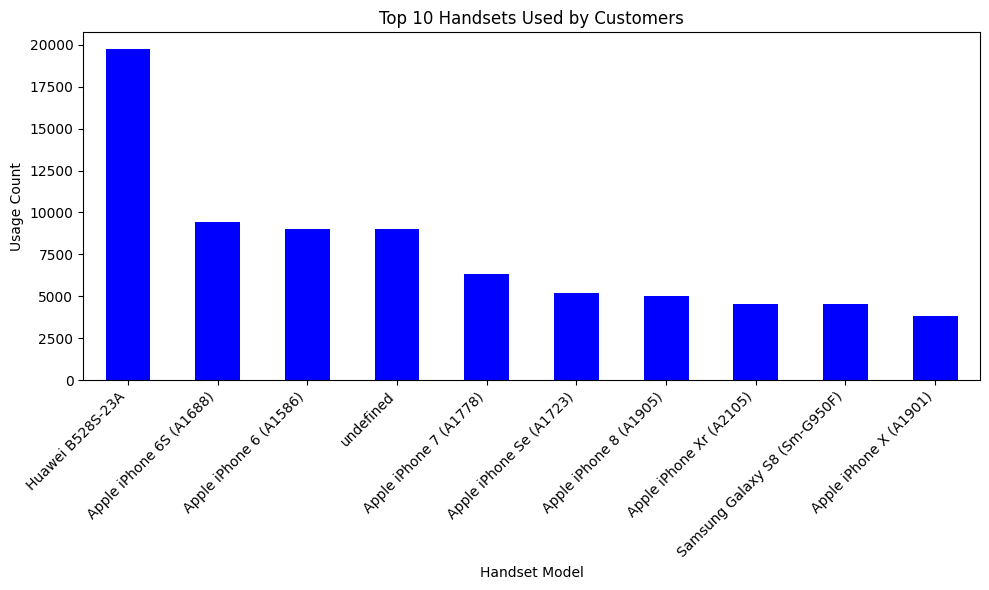

In [12]:
top10_handsets = df['Handset Type'].value_counts()
top10_handsets = top10_handsets.sort_values(ascending=False).head(10)
print("Top 10 Handsets:")
print(top10_handsets)

#visuals
plt.figure(figsize=(10, 6))
top10_handsets.plot(kind='bar', color='blue')
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Handset Model')
plt.ylabel('Usage Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 3 Handset Manufacturers:
Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


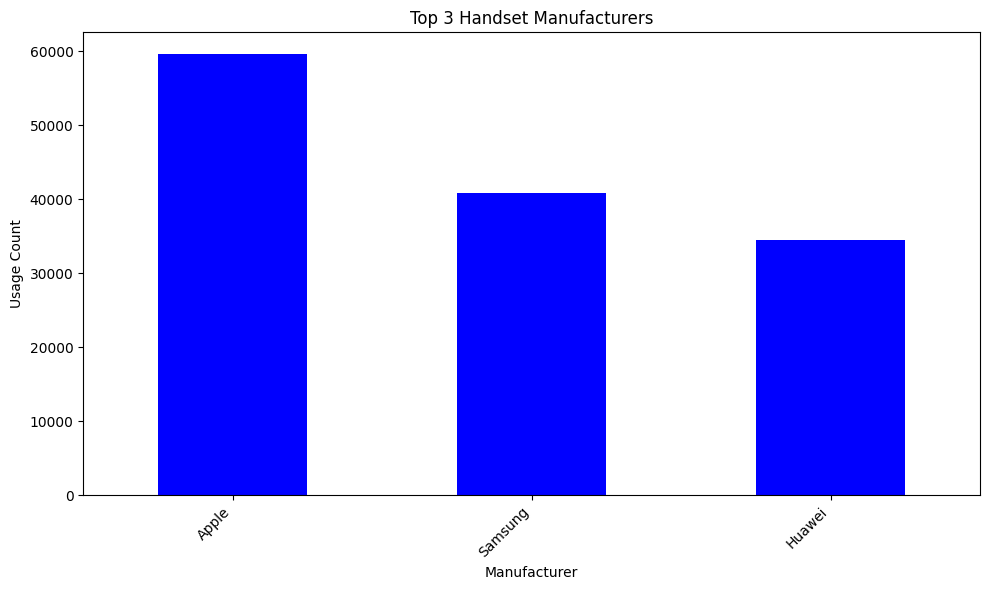

In [14]:
df['Manufacturer'] = df['Handset Type'].str.split().str[0]
top3_manufacturers = df['Manufacturer'].value_counts().sort_values(ascending=False).head(3)
print("Top 3 Handset Manufacturers:")
print(top3_manufacturers)

#visuals
plt.figure(figsize=(10, 6))
top3_manufacturers.plot(kind='bar', color='blue')
plt.title('Top 3 Handset Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Usage Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 5 Handsets per Top 3 Handset Manufacturers:
Manufacturer  Handset Type                  
Apple         Apple iPhone 6S (A1688)            9419
              Apple iPhone 6 (A1586)             9023
              Apple iPhone 7 (A1778)             6326
              Apple iPhone Se (A1723)            5187
              Apple iPhone 8 (A1905)             4993
Huawei        Huawei B528S-23A                  19752
              Huawei E5180                       2079
              Huawei P20 Lite Huawei Nova 3E     2021
              Huawei P20                         1480
              Huawei Y6 2018                      997
Samsung       Samsung Galaxy S8 (Sm-G950F)       4520
              Samsung Galaxy A5 Sm-A520F         3724
              Samsung Galaxy J5 (Sm-J530)        3696
              Samsung Galaxy J3 (Sm-J330)        3484
              Samsung Galaxy S7 (Sm-G930X)       3199
dtype: int64


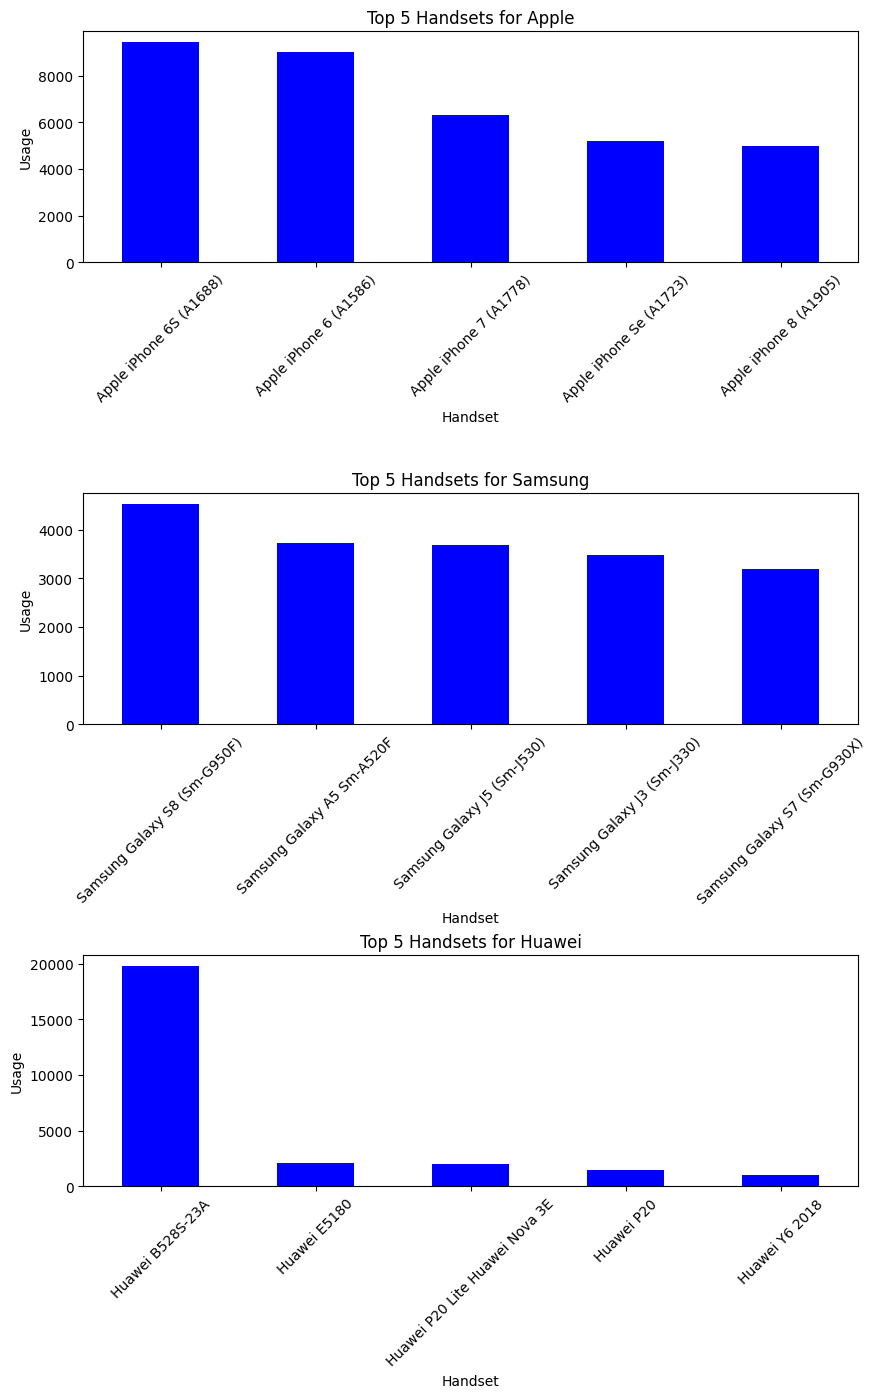

In [15]:
top_3_manufacturer_data = df[df['Manufacturer'].isin(top3_manufacturers.index)]
top_5_handsets_per_manufacturer = top_3_manufacturer_data.groupby(['Manufacturer', 'Handset Type']).size().groupby('Manufacturer').nlargest(5).reset_index(level=0, drop=True)
print("Top 5 Handsets per Top 3 Handset Manufacturers:")
print(top_5_handsets_per_manufacturer)

#visuals
figure, axis = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
plt.subplots_adjust(hspace=1)
for i, manufacturer in enumerate(top3_manufacturers.index):
    manufacturer_data = top_3_manufacturer_data[top_3_manufacturer_data['Manufacturer'] == manufacturer]
    top_5_handsets = manufacturer_data['Handset Type'].value_counts().head(5)
    top_5_handsets.plot(kind='bar', ax=axis[i], color='blue')
    axis[i].set_title(f'Top 5 Handsets for {manufacturer}')
    axis[i].set_xlabel('Handset')
    axis[i].set_ylabel('Usage')
    axis[i].tick_params(axis='x', rotation=45)
plt.show()

MSISDN/Number
3.360100e+10    1
3.360100e+10    1
3.360100e+10    1
3.360101e+10    1
3.360101e+10    2
               ..
3.379000e+10    1
3.379000e+10    1
3.197021e+12    1
3.370000e+14    1
8.823971e+14    1
Name: Bearer Id, Length: 106856, dtype: int64


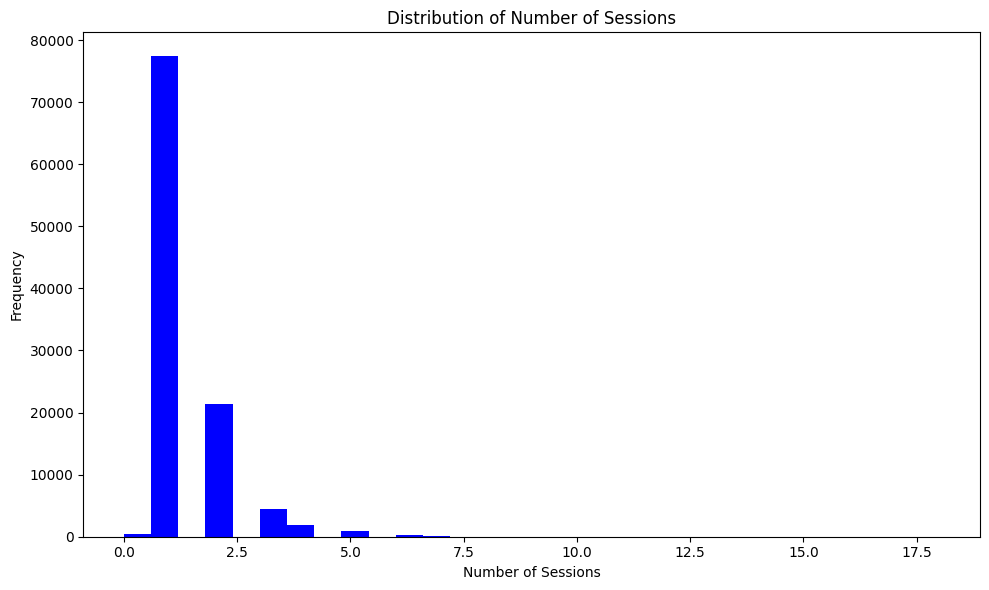

In [16]:
sessions_num = df.groupby('MSISDN/Number')['Bearer Id'].count()
print(sessions_num)

#plot
plt.figure(figsize=(10, 6))
sessions_num.plot(kind='hist', bins=30, color='blue')
plt.title('Distribution of Number of Sessions')
plt.xlabel('Number of Sessions')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

MSISDN/Number
3.360100e+10    116720.0
3.360100e+10    181230.0
3.360100e+10    134969.0
3.360101e+10     49878.0
3.360101e+10     37104.0
                  ...   
3.379000e+10      8810.0
3.379000e+10    140988.0
3.197021e+12    877385.0
3.370000e+14    253030.0
8.823971e+14    869844.0
Name: Dur. (ms), Length: 106856, dtype: float64


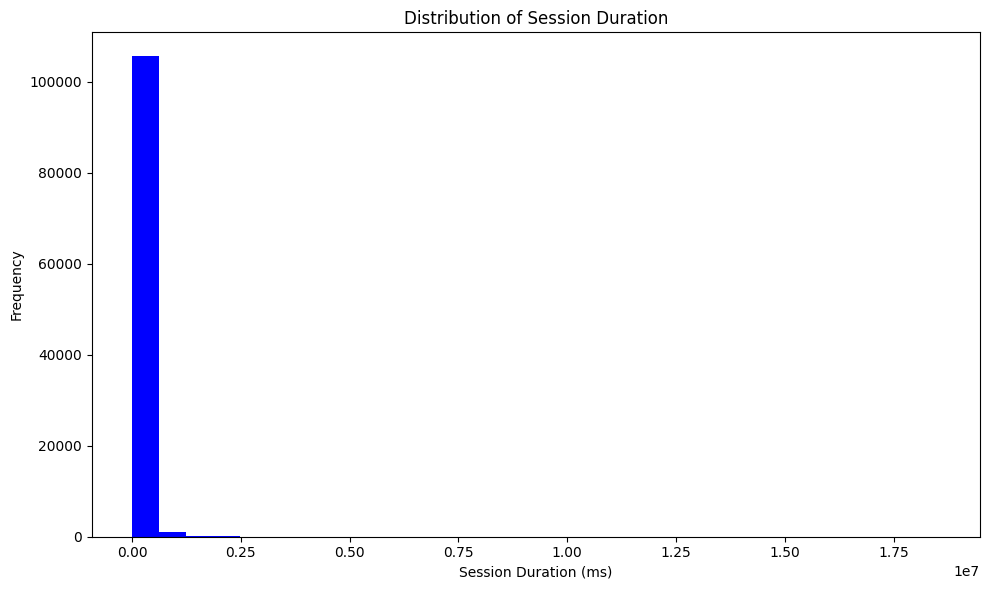

In [18]:
session_duration = df.groupby('MSISDN/Number')['Dur. (ms)'].sum()
print(session_duration)

#visualize
plt.figure(figsize=(10, 6))
session_duration.plot(kind='hist', bins=30, color='blue')
plt.title('Distribution of Session Duration')
plt.xlabel('Session Duration (ms)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

               Total DL (Bytes)  Total UL (Bytes)
MSISDN/Number                                    
3.360100e+10       8.426375e+08        36053108.0
3.360100e+10       1.207552e+08        36104459.0
3.360100e+10       5.566597e+08        39306820.0
3.360101e+10       4.019932e+08        20327526.0
3.360101e+10       1.363130e+09        94280527.0
...                         ...               ...
3.379000e+10       6.879252e+08        26716429.0
3.379000e+10       4.445751e+08        35732243.0
3.197021e+12       1.948281e+08        37295915.0
3.370000e+14       5.396350e+08        56652839.0
8.823971e+14       7.869760e+07        60456049.0

[106856 rows x 2 columns]


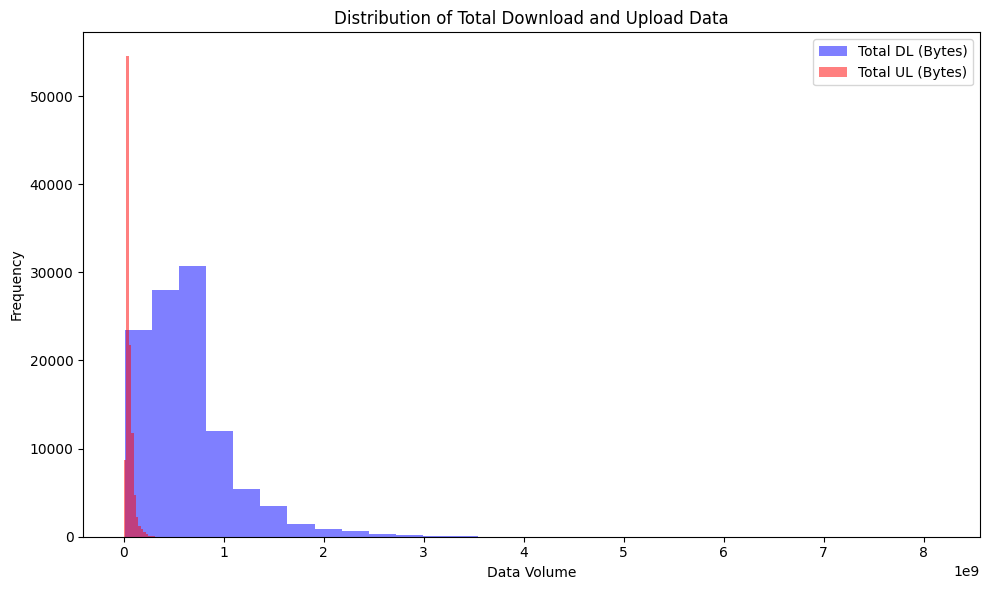

In [20]:
total_DL= df.groupby('MSISDN/Number')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum()
print(total_DL)

#visualize
plt.figure(figsize=(10, 6))
total_DL['Total DL (Bytes)'].plot(kind='hist', bins=30, color='blue', alpha=0.5, label='Total DL (Bytes)')
total_DL['Total UL (Bytes)'].plot(kind='hist', bins=30, color='red', alpha=0.5, label='Total UL (Bytes)')
plt.title('Distribution of Total Download and Upload Data')
plt.xlabel('Data Volume')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\Yunus\AppData\Local\Temp\ipykernel_14460\763647176.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  session_duration_deciles = session_duration_deciles.groupby('Dur. (ms)').sum()


           Total Data (DL+UL)
Dur. (ms)                    
Decile 1         5.439277e+12
Decile 2         6.109410e+12
Decile 3         6.536402e+12
Decile 4         6.034241e+12
Decile 5         4.971412e+13


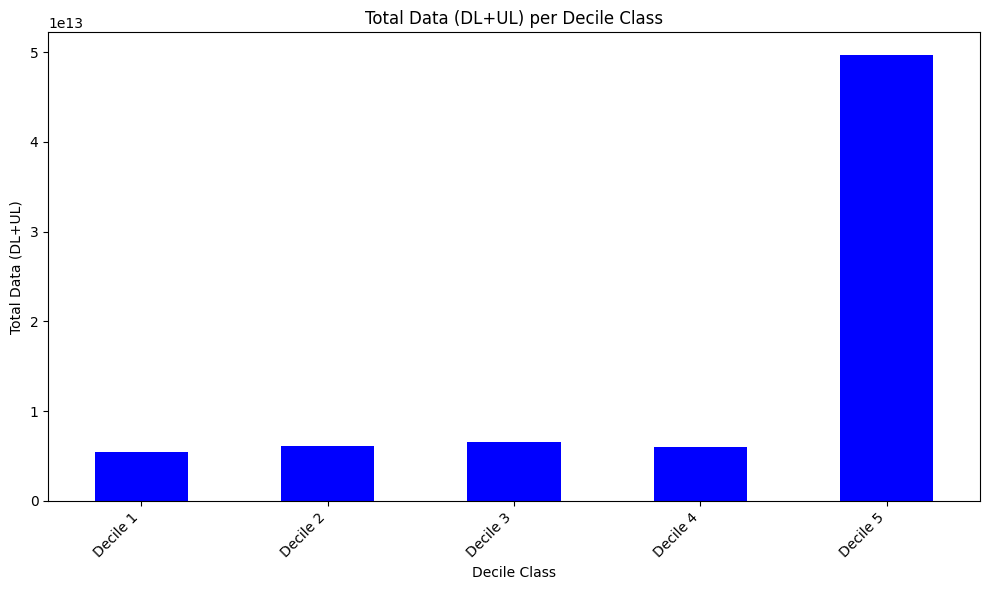

In [21]:
# segment the users into the top five decile
deciles = session_duration.quantile([.1, .2, .3, .4])
deciles = deciles.to_list()
deciles = [0] + deciles + [session_duration.max()]
labels = ['Decile 1', 'Decile 2', 'Decile 3', 'Decile 4', 'Decile 5']
session_duration_deciles = pd.cut(session_duration, bins=deciles, labels=labels)
# Display the decile classes and the corresponding total data (DL+UL) per decile class
session_duration_deciles = pd.DataFrame(session_duration_deciles)
session_duration_deciles['Total Data (DL+UL)'] = total_DL.sum(axis=1)
session_duration_deciles = session_duration_deciles.groupby('Dur. (ms)').sum()
print(session_duration_deciles)

plt.figure(figsize=(10, 6))
session_duration_deciles['Total Data (DL+UL)'].plot(kind='bar', color='blue')
plt.title('Total Data (DL+UL) per Decile Class')
plt.xlabel('Decile Class')
plt.ylabel('Total Data (DL+UL)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
# Compute the five-number summary, mean, and variance of the specified variables
variables = ['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']
summary = df[variables].describe().T[['min', '25%', '50%', '75%', 'max', 'mean', 'std']]
summary.columns = ['Min', 'Q1', 'Median', 'Q3', 'Max', 'Mean', 'Std']
summary['Variance'] = df[variables].var()
# Display the five-number summary, mean, and variance of the specified variables
print(summary)

                               Min           Q1       Median            Q3  \
Dur. (ms)                   7142.0      57440.5      86399.0  1.324302e+05   
Total DL (Bytes)         7114041.0  243106803.0  455841077.5  6.657055e+08   
Total UL (Bytes)         2866892.0   33222010.5   41143312.0  4.903424e+07   
Social Media DL (Bytes)       12.0     899148.0    1794369.0  2.694938e+06   
Social Media UL (Bytes)        0.0      16448.0      32920.0  4.933400e+04   
Google DL (Bytes)            207.0    2882393.0    5765829.0  8.623552e+06   
Google UL (Bytes)              3.0    1024279.0    2054573.0  3.088454e+06   
Email DL (Bytes)              14.0     892793.0    1793505.0  2.689327e+06   
Email UL (Bytes)               2.0     233383.0     466250.0  7.004400e+05   
Youtube DL (Bytes)            53.0    5833501.0   11616019.0  1.744852e+07   
Youtube UL (Bytes)           105.0    5517965.0   11013447.0  1.651556e+07   
Netflix DL (Bytes)            42.0    5777156.0   11642217.0  1.

In [23]:
# Compute the dispersion parameters for each quantitative variable
dispersion = df[variables].agg(['var', 'std', 'skew', 'kurt'])
dispersion.loc['range'] = df[variables].max() - df[variables].min()
print(dispersion)

          Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
var    6.567096e+09      5.960574e+16      1.271569e+14   
std    8.103762e+04      2.441429e+08      1.127639e+07   
skew   3.952609e+00     -3.153364e-03     -2.456000e-03   
kurt   3.702219e+01     -1.198375e+00     -3.274536e-01   
range  1.852194e+06      8.958556e+08      7.546442e+07   

       Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  \
var               1.072224e+12             3.612348e+08       1.095012e+13   
std               1.035482e+06             1.900618e+04       3.309097e+06   
skew             -2.136239e-03            -3.592529e-04      -8.092348e-03   
kurt             -1.202894e+00            -1.200523e+00      -1.203347e+00   
range             3.586052e+06             6.587000e+04       1.146262e+07   

       Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  \
var         1.415902e+12      1.072963e+12      7.288343e+10   
std         1.189917e+06      1.035840e+06      

<Figure size 640x480 with 0 Axes>

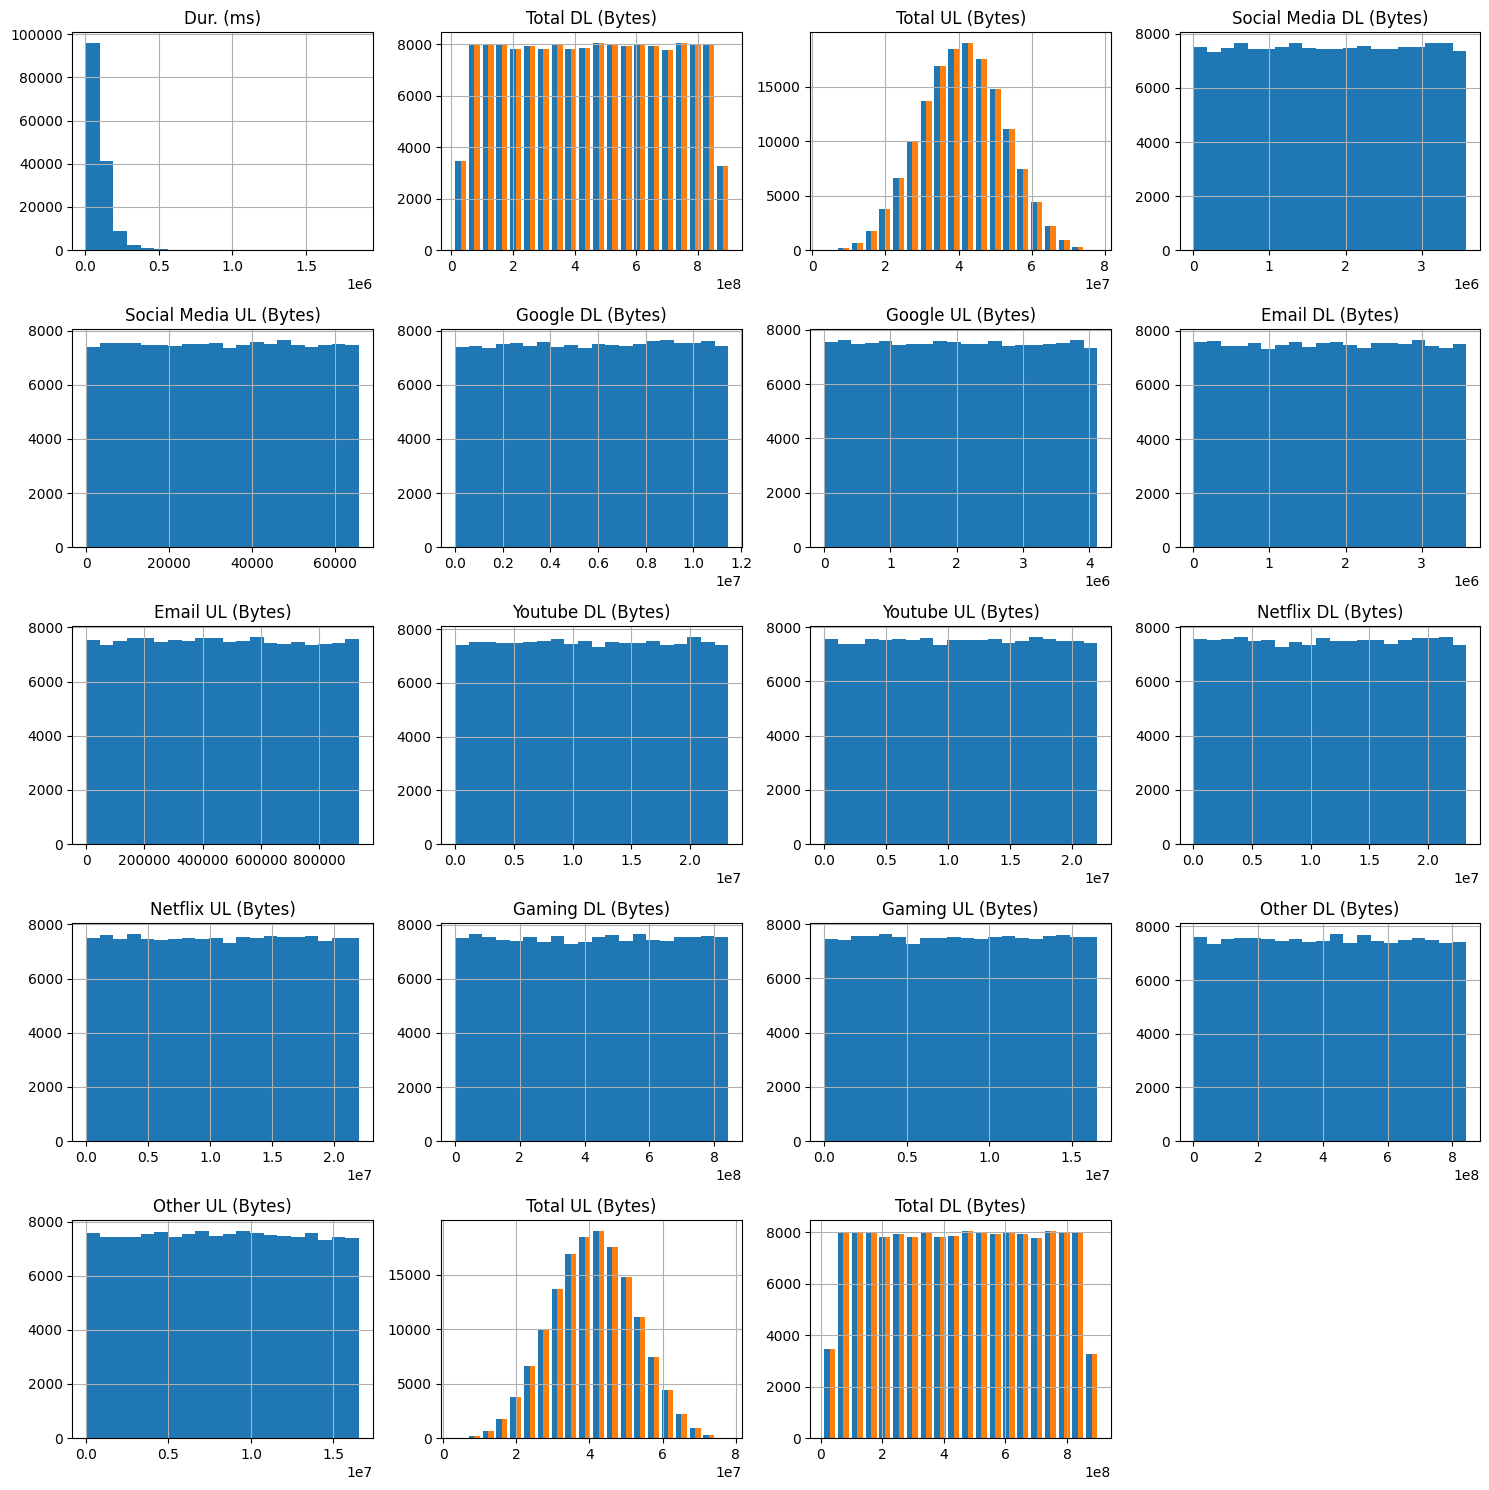

In [24]:
# visual of dispersion on variables 
plt.suptitle('Histograms of Quantitative Variables', y=0.92)
df[variables].hist(figsize=(15, 15), bins=20)
plt.tight_layout()
plt.show()